# Iris Species Customized Clustering
###### Input - Sepal Length, Sepal Width, Petal Length, Petal Width, Species name
###### Output - Cluster iris plants into three species in this  dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### Eucledian Distance between multi-dimensional points

In [2]:
def eucledian_distance(x,y):
    if len(x) != len(y):
        return print("x and y should have same length")
    summation = 0
    for i in range(len(x)):
        summation += (x[i]-y[i])**2
    return summation**(1/2.0)

### Cluster Assignment Step - assign datapoint to the closest centroid

In [3]:
def closestCentroids(X, centroids):
    distance = []
    c = []
    xcent = []
    selectxcent = []
    for i in range(len(X)):
        for j in range(len(centroids)):
            distance.append(eucledian_distance(X[i],centroids[j]))
            xcent.append((X[i],centroids[j]))
        minimum = min(distance)
        c.append(distance.index(minimum))
        selectxcent.append(xcent[distance.index(minimum)])
        distance = []
        xcent = []
    return c,selectxcent

###  Move Centroid Step - Recompute Centroid location

In [43]:
def computeMeans(X, idx, K):
    means = []
    zipped = list(zip(idx,X))
    for i in range(K):
        filtered = [item for item in zipped if item[0] == i]
        coordinates = [item[1] for item in filtered]
        mean = [sum(item)/len(item) for item in zip(*coordinates)]
        means.append(mean)
    return means

### Centroid Random Pick

In [5]:
import random
def randomInitialization(X,k):
    random.shuffle(X)
    return X[0:k]

### Choose Least Cost best initial centroid

In [21]:
def optimumInitialization(X,k):
    cost = 0
    selectmin = []
    for i in range(num_iterations):
        new_centroid = randomInitialization(X,k)
        clusters, xcent = KMeans(X,k,new_centroid)
        for j in range(len(xcent)):
            cost += eucledian_distance(xcent[j][0],xcent[j][1])
        selectmin.append((cost,new_centroid))
        cost = 0
        mincostcentroid = min(selectmin, key = lambda t: t[0])[1]
    return mincostcentroid

### Run KMeans to get final Clusters

In [44]:
def KMeans(X,k,new_centroid):
    past_centroid = [[0]*len(item) for item in new_centroid]
    i = 0
    # Termination Condition
    while (i<num_iterations) & (new_centroid != past_centroid):
        past_centroid = new_centroid
        # Cluster Assignment Step
        cluster, xcent = closestCentroids(X, past_centroid)
        # Centroid Movement
        new_centroid = computeMeans(X, cluster, k)
        i+=1
    return cluster, xcent

### Load Iris dataset and set number of iterations

In [8]:
data = np.loadtxt('/Users/akshatkumar/Downloads/Iris.csv', delimiter=',', skiprows=1, usecols=[1,2,3,4,5])
num_iterations = 20

In [22]:
optimum = optimumInitialization(data[:,0:4].tolist(),3)

### Run KMeans on the Iris Input Features

In [13]:
clusters, s = KMeans(data[:,0:4].tolist(), 3, optimum)

In [39]:
color = np.array(['red','green','blue'])

### Comparisons before and after KMeans Clustering through Scatter Plot

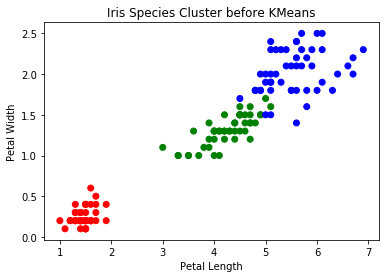

In [42]:
plt.title('Iris Species Cluster before KMeans')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(data[:,2], data[:,3], c = color[data[:,4].astype(int)])

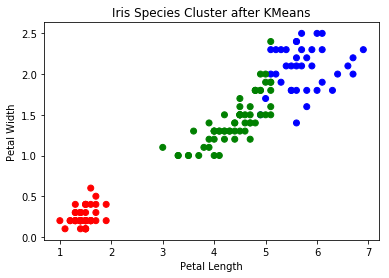

In [35]:
plt.title('Iris Species Cluster after KMeans')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(data[:,2], data[:,3], c = color[clusters])

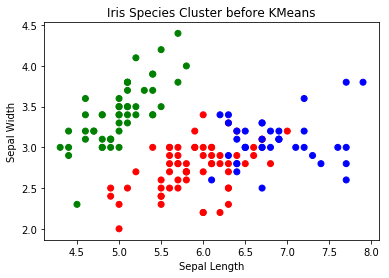

In [41]:
plt.title('Iris Species Cluster before KMeans')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(data[:,0], data[:,1], c = color[clusters])

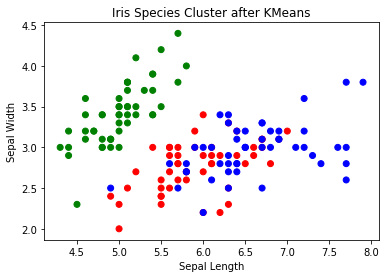

In [38]:
plt.title('Iris Species Cluster after KMeans')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(data[:,0], data[:,1], c = color[data[:,4].astype(int)])